In [973]:
# import numpy as np
import scipy
import matplotlib.pyplot as plt

#This the test cell, the actual linear regression is at the end. 

def RHS(u,t,w):
    """For 1:1:2 resonance"""
    dydt = np.zeros(6)
    x = u[0]
    y = u[2]
    z = u[4]
    dydt[0] = u[1]
    dydt[1] = lambd*x*z-x*w**2
    dydt[2] = u[3]
    dydt[3] = lambd*y*z-y*w**2
    dydt[4] = u[5]
    dydt[5] = lambd/2*(x**2+y**2)-4*w**2*z
    return dydt

%pylab inline
from scipy.integrate import odeint
z0 = 0.012
x0 =  0.00012
y0 = 0
y0d= 0.00489
ic = (x0,0,y0,y0d,z0,0)

l = 1
g = np.pi**2

m = 1
k = 4*g*m/l
w= np.sqrt(g/l)
eta_1 = g*z0/y0d**2
eta_2 = l/z0
eta_3 = x0/z0
lambd = 3*g/l**2
t = np.linspace(0,400,500001)
u = odeint(RHS,ic,t,args=(w,))
x = u[:,0]
y = u[:,2]
z = u[:,4]
print('Equations solved')
eta = [eta_1,eta_2,eta_3]

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['angle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Equations solved


Precession angle 2.677930527108863 degrees


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


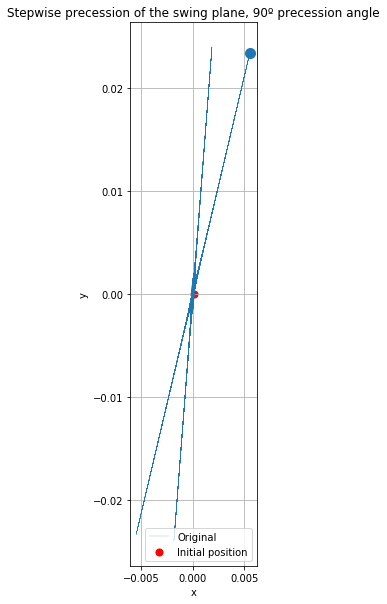

In [974]:
def compute_precession_angle(x,y):
    """A function that returns the precession angle"""
    yneg=y <= 0
    xpos=x.copy()
    xpos[yneg]=0
    t1 = np.argmax(xpos)
    #t2 = np.argmax(y)
    v1 = np.array([x[t1],y[t1]])
    #v2 = np.array([x[t2],y[t2]])
    cosangle = v1@np.array([1,0])/(np.sqrt(v1@v1))
    return 2*np.arccos(cosangle),t1

angle,t1 = compute_precession_angle(x,y)
print('Precession angle {} degrees'.format(angle))
plt.figure(figsize=(10,10))
plt.plot(x,y,linewidth=0.2,label='Original')
plt.scatter(x[t1],y[t1], s=100)
#plt.scatter(x[t2],y[t2], s=100)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stepwise precession of the swing plane, 90º precession angle')#, {} {} {} '.format(eta_1,eta_2,eta_3))


plt.scatter(x0,y0,c='r', label='Initial position',s=50)

#plt.xlim(-3, 3)
#plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


<Figure size 288x288 with 0 Axes>

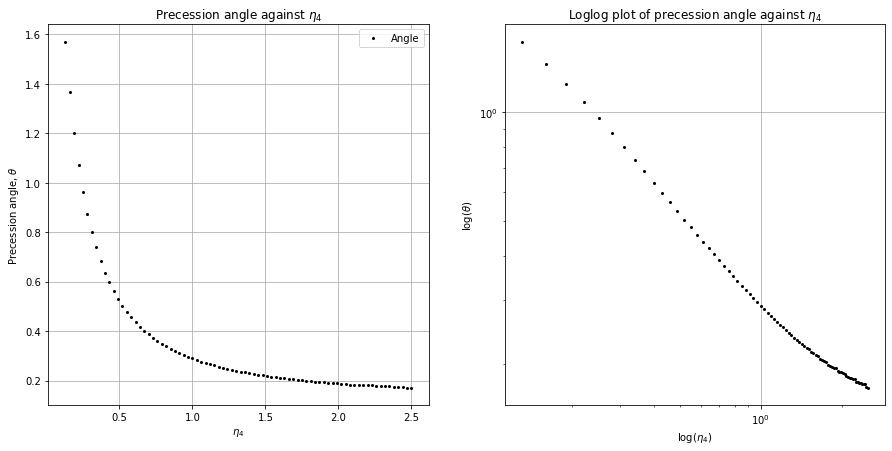

0.9896957507693287


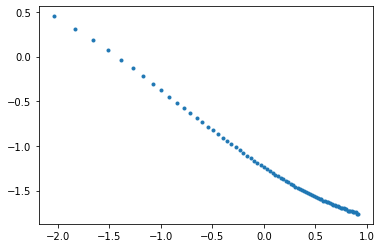

In [1045]:
#eta_4 we vary x0
initial_x = np.linspace(0.00156,0.03,80)
z0 = 0.012
angles4 = np.zeros_like(initial_x)
eta_4 = initial_x/z0
l = 1
g = np.pi**2
m = 1
k = 4*g*m/l
w = np.sqrt(g/l)
lambd = 3*g/l**2
i = 0
t = np.linspace(0,370,10001)
plt.figure(figsize=(4,4))
preangle=0
count = 1
for x0 in initial_x:
    y0 = (x0,0,0,0.00489,z0,0)
    u = odeint(RHS,y0,t,args=(w,),atol=0.00000000001)
    x = u[:,0]
    y = u[:,2]
    z = u[:,4]
    angle,t1 = compute_precession_angle(x,y)
    
    

    
    #if angle > angles[i-1]  and i > 0:
        
        #if angle > preangle:

            #count += 1

        #preangle = angle
        #angle = angle/count
   
    angles4[i] = angle
    i += 1
    #plt.plot(x,y, linewidth=0.1,label='{}'.format(i))
    #plt.scatter(x[t1],y[t1])

    #plt.plot(t, z, linewidth=0.1)
#plt.legend()
plt.show()
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(eta_4,angles4,'.',label='Angle', markersize=4,c='black')
plt.xlabel(r'$\eta_4$')
plt.ylabel(r'Precession angle, $\theta$')
plt.legend()
plt.grid()
plt.title(r'Precession angle against $\eta_4$')

from sklearn.linear_model import LinearRegression
plt.subplot(1,2,2)
plt.loglog(eta_4,angles4,'.',markersize=4,c='black')
plt.title(r'Loglog plot of precession angle against $\eta_4$')
plt.xlabel(r'$\log(\eta_4)$')
plt.ylabel(r'$\log(\theta)$')
plt.grid()
plt.show()
model4 = LinearRegression()
model4.fit(np.log(eta_4.reshape((-1,1))), np.log(angles4))
eta_1 = g*z0/y0d**2
eta_2 = l/z0

a = -0.48177364
b = 0.46678265

print(model4.score(np.log(eta_4.reshape((-1,1))), np.log(angles4)))
plt.plot(np.log(eta_4), np.log(angles4),'.')


[-0.75973438]
-1.1699012851606558


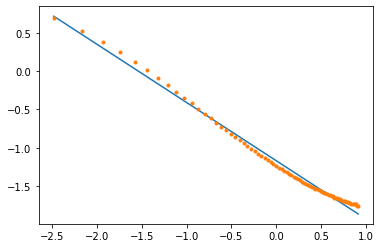

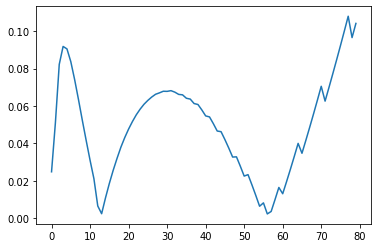

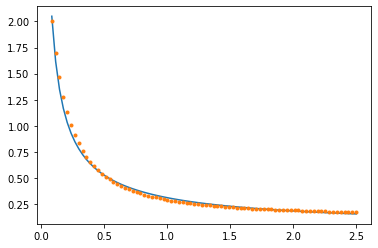

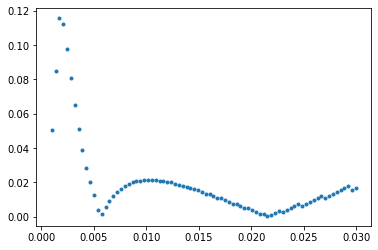

In [983]:
#exploratory error analysis
slope = model4.coef_
print(slope)
m = model4.intercept_
print(m)
hat = np.log(eta_4)*slope+m
plt.plot(np.log(eta_4), hat)
plt.plot(np.log(eta_4), np.log(angles4),'.')
plt.show()
rlog = np.log(angles4) -  model4.predict(np.log(eta_4).reshape(-1,1))
plt.plot(np.abs(rlog))
plt.show()
plt.plot(eta_4, np.exp(model4.predict(np.log(eta_4).reshape(-1,1))))
plt.plot(eta_4, angles4,'.')
plt.show()
r1 = angles4-eta_4**slope*np.exp(m)
r2 = angles4-np.exp(model4.predict(np.log(eta_4).reshape(-1,1)))
plt.plot(initial_x, np.abs(r1),'.')
#plt.plot(np.abs(r2))

In [367]:
I = model4.intercept_
Gamma=np.exp(I-a*np.log(eta_1)-b*np.log(eta_2))
print(Gamma)

1.919719389967028


angles computed


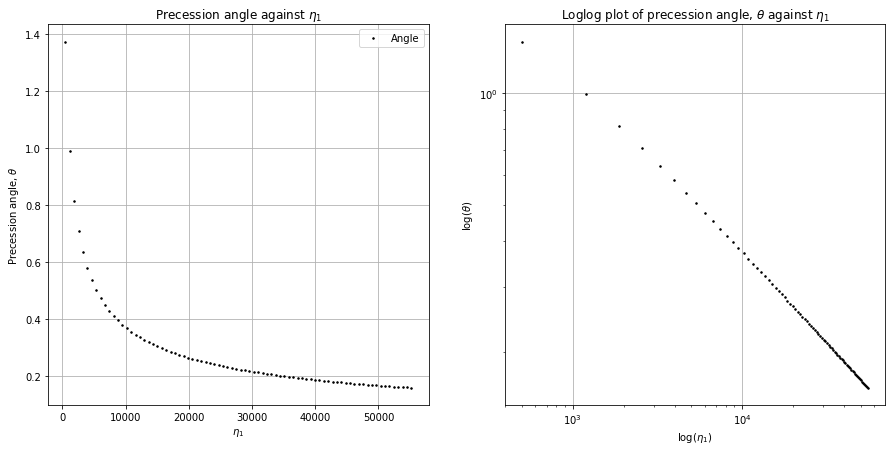

0.9987891958785678

In [1046]:
#vary g, obtain c+a
grav=np.linspace(1,110,80)

angles1=np.zeros_like(grav)
z0=0.012
x0=0.006
y0d=0.00489
y0 = (x0,0,0,y0d,z0,0)
l = 1
m = 1
t = np.linspace(0,350,100001)
i=0
eta_1 = grav*z0/y0d**2
for g in grav:
    k = 4*g*m/l
    w = np.sqrt(g/l)
    lambd = 3*g/l**2

    u = odeint(RHS,y0,t,args=(w,),atol=0.00000000001)
    x = u[:,0]
    y = u[:,2]
    z = u[:,4]
    angle, t1 = compute_precession_angle(x,y)
    #print(f'angle {angle}, g {g}')
    angles1[i] = angle
    i += 1
print('angles computed')
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(eta_1,angles1,'.',label='Angle', markersize=3,c='black')
plt.xlabel(r'$\eta_1$')
plt.ylabel(r'Precession angle, $\theta$')
plt.legend()
plt.grid()
plt.title(r'Precession angle against $\eta_1$')

from sklearn.linear_model import LinearRegression
plt.subplot(1,2,2)
plt.loglog(eta_1,angles1,'.',markersize=3,c='black')
plt.title(r'Loglog plot of precession angle, $\theta$ against $\eta_1$')
plt.xlabel(r'$ \log( \eta_1)$')
plt.ylabel(r'$\log(\theta)$')
plt.grid()
plt.show()
modelg = LinearRegression()
modelg.fit(np.log(eta_1.reshape((-1,1))), np.log(angles1))
modelg.score(np.log(eta_1.reshape((-1,1))), np.log(angles1))


In [480]:
#print(grav)
modelg.coef_


array([-0.46920454])

First angles computed
angles computed


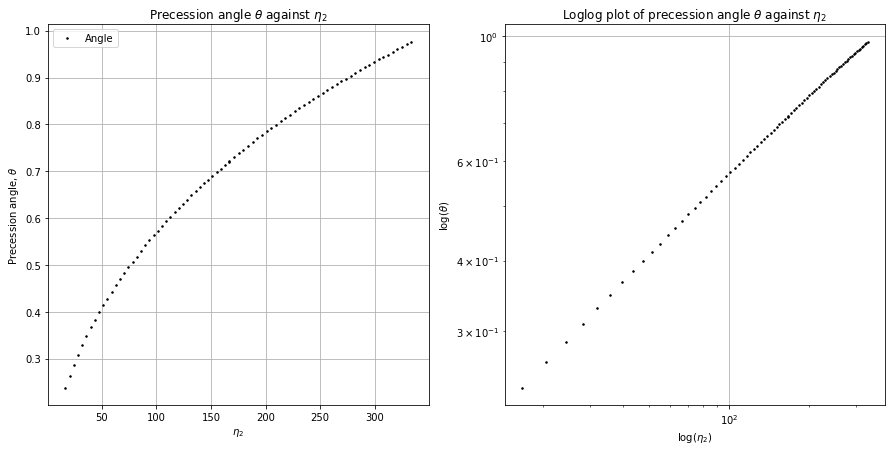

0.9993982884765571

In [1047]:
#vary l
n=40
l=np.linspace(0.2,2,n)
l2=np.linspace(2,4, n)

angles2=np.zeros(2*n)
z0 = 0.012
x0 = 0.006
y0d = 0.00489
y0 = (x0,0,0,y0d,z0,0)

g = np.pi**2
m = 1


t = np.linspace(0,200,10001)

i=0
for lval in l:
    k = 4*g*m/lval
    w = np.sqrt(g/lval)
    lambd = 3*g/lval**2
    u = odeint(RHS,y0,t,args=(w,),atol=0.00000000001)
    x = u[:,0]
    y = u[:,2]
    z = u[:,4]
    angle,t1 = compute_precession_angle(x,y)
    angles2[i] = angle
    i += 1
print('First angles computed')
t = np.linspace(0,1000,100001)
for lval in l2:
    k = 4*g*m/lval
    w = np.sqrt(g/lval)
    lambd = 3*g/lval**2
    u = odeint(RHS,y0,t,args=(w,),atol=0.00000000001)
    x = u[:,0]
    y = u[:,2]
    z = u[:,4]
    angle,t1 = compute_precession_angle(x,y)
    angles2[i] = angle
    i += 1
print('angles computed')
bigl=np.concatenate((l,l2), axis=None)
eta_2= bigl/z0
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(eta_2,angles2,'.',label='Angle',markersize=3,c='black')
plt.xlabel(r'$\eta_2$')
plt.ylabel(r'Precession angle, $\theta$')
plt.legend()
plt.grid()
plt.title(r'Precession angle $\theta$ against $\eta_2$')

from sklearn.linear_model import LinearRegression
plt.subplot(1,2,2)
plt.loglog(eta_2,angles2,'.',markersize=3,c='black')
plt.title(r'Loglog plot of precession angle $\theta$ against $\eta_2$')
plt.xlabel(r'$\log(\eta_2)$')
plt.ylabel(r'$\log(\theta)$')
plt.grid()
plt.show()
modell = LinearRegression()
modell.fit(np.log(bigl.reshape((-1,1))), np.log(angles2))
modell.score(np.log(bigl.reshape((-1,1))), np.log(angles2))

In [481]:
modell.coef_

array([0.48803835])

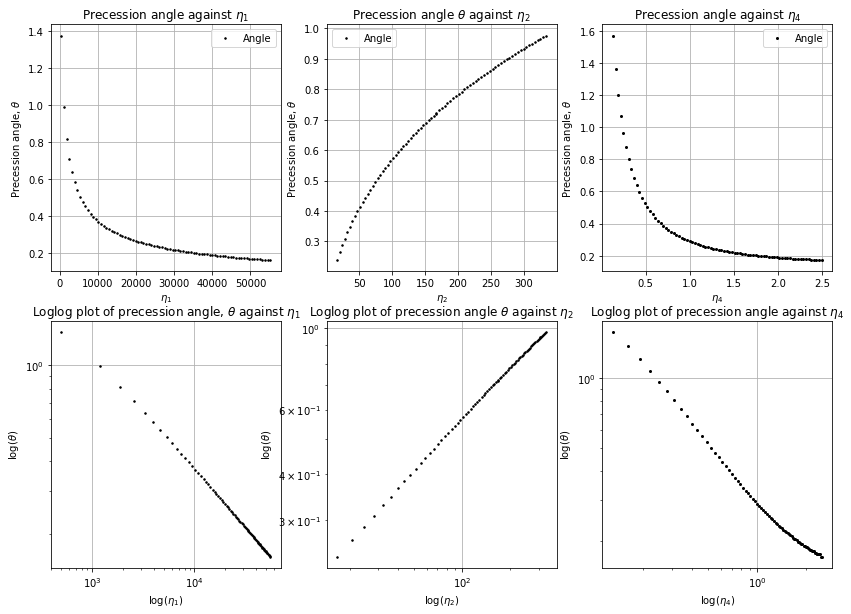

In [1050]:
#Figure in the report
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
eta_1 = grav*z0/y0d**2
plt.plot(eta_1,angles1,'.',label='Angle', markersize=3,c='black')
plt.xlabel(r'$\eta_1$')
plt.ylabel(r'Precession angle, $\theta$')
plt.legend()
plt.grid()
plt.title(r'Precession angle against $\eta_1$')

plt.subplot(2,3,4)
plt.loglog(eta_1,angles1,'.',markersize=3,c='black')
plt.title(r'Loglog plot of precession angle, $\theta$ against $\eta_1$')
plt.xlabel(r'$ \log( \eta_1)$')
plt.ylabel(r'$\log(\theta)$')
plt.grid()


plt.subplot(2,3,2)
plt.plot(eta_2,angles2,'.',label='Angle',markersize=3,c='black')
plt.xlabel(r'$\eta_2$')
plt.ylabel(r'Precession angle, $\theta$')
plt.legend()
plt.grid()
plt.title(r'Precession angle $\theta$ against $\eta_2$')


plt.subplot(2,3,5)
plt.loglog(eta_2,angles2,'.',markersize=3,c='black')
plt.title(r'Loglog plot of precession angle $\theta$ against $\eta_2$')
plt.xlabel(r'$\log(\eta_2)$')
plt.ylabel(r'$\log(\theta)$')
plt.grid()


plt.subplot(2,3,3)
plt.plot(eta_4,angles4,'.',label='Angle', markersize=4,c='black')
plt.xlabel(r'$\eta_4$')
plt.ylabel(r'Precession angle, $\theta$')
plt.legend()
plt.grid()
plt.title(r'Precession angle against $\eta_4$')


plt.subplot(2,3,6)
plt.loglog(eta_4,angles4,'.',markersize=4,c='black')
plt.title(r'Loglog plot of precession angle against $\eta_4$')
plt.xlabel(r'$\log(\eta_4)$')
plt.ylabel(r'$\log(\theta)$')
plt.grid()
plt.show()

Equations solved


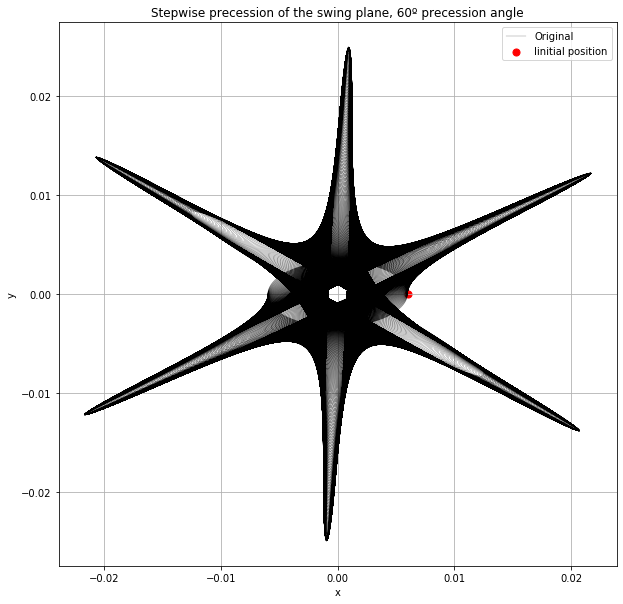

In [516]:
z0 = 0.012
x0 = 0.006
y0 = 0
y0d = 0.00489
ic = (x0,0,y0,y0d,z0,0)
#testing for some angles
l = hexagonal_x0+0.2
g = np.pi**2

m = 1
k = 4*g*m/l
w= np.sqrt(g/l)
eta_1 = g*z0/y0d**2
eta_2 = l/z0
eta_3 = x0/z0
lambd = 3*g/l**2
t = np.linspace(0,4100,100001)
u = odeint(RHS,ic,t,args=(w,),atol=0.00000000001)
x = u[:,0]
y = u[:,2]
z = u[:,4]
print('Equations solved')
eta = [eta_1,eta_2,eta_3]
plt.figure(figsize=(10,10))
plt.plot(x,y,linewidth=0.2,label='Original', c='black')

#plt.scatter(x[t2],y[t2], s=100)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stepwise precession of the swing plane, 60º precession angle')#, {} {} {} '.format(eta_1,eta_2,eta_3))

plt.scatter(x0,y0,c='r', label='Iinitial position',s=50)
plt.legend()
plt.show()

In [856]:
#This is the actual linear regression. This cell takes a long time, I have left it
#with a small value of n in case you want to see it running but we used n=5 which has 8000 points
n = 2
initial_x = np.linspace(0.002,0.03,2*n)
z0 = 0.012
y0d = 0.00489
eta3 = initial_x/z0
grav = np.linspace(2.5,110,2*n)
eta_1 = grav*z0/y0d**2

l1=np.linspace(0.4,1.2,2*n)
eta2_1 = l1/z0
l2=np.linspace(2.1,4, 0)
bigl=np.concatenate((l,l2), axis=None)
eta2_2=l2/z0
angles = np.zeros(8*n**3)
ones = np.ones(8*n**3)
log_design = np.zeros((8*n**3, 3))
#log_design[:,0] = ones
parameter_mat = np.zeros((8*n**3, 3))
i = 0
for x0 in initial_x:
    ic = (x0,0,0,0.00489,z0,0)
    for g in grav:
        
        for l in l1:
            parameter_mat[i,:] = np.array([g,l,x0])
            log_design[i,:] = np.log(np.array([g*z0/y0d**2,l/z0,x0/z0]))
            i += 1

t = np.linspace(0,150,30001)

print('Design matrix obtained')
for i in range(len(angles)):
    ic = (parameter_mat[i, 2],0,0,0.00489,z0,0)
    g = parameter_mat[i,0]
    l = parameter_mat[i,1]
    k = 4*g*m/l
    w = np.sqrt(g/l)
    lambd = 3*g/l**2
    u = odeint(RHS,ic,t,args=(w,))
    x = u[:,0]
    y = u[:,2]
    z = u[:,4]
    angle, t1 = compute_precession_angle(x,y) 
    angles[i] = angle
    #plt.figure(figsize=(10,10))
    #plt.plot(x,y)
    #plt.grid()
    #plt.scatter(x[t1],y[t1])
    #plt.gca().set_aspect('equal', adjustable='box')
    #plt.show()
    if i % 100 == 0:
        print(f'100 loops done')

print('Angles computed')


Design matrix obtained
100 loops done
Angles computed


In [857]:
#print(parameter_mat)
modelz = LinearRegression()
modelz.fit(log_design, np.log(angles))
modelz.score(log_design, np.log(angles))

0.9796813456045551

In [884]:
print(np.exp(modelz.intercept_))
c = modelz.coef_
print(c)
alpha = c[0]
beta = c[1]
gamma = c[2]

2.404937811291076
[-0.45636937  0.41040293 -0.78649038]


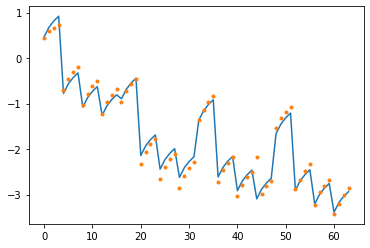

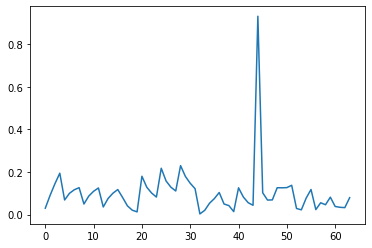

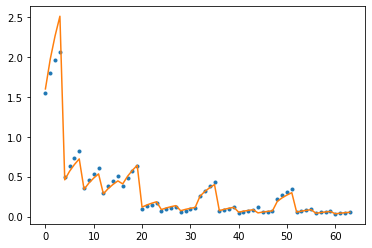

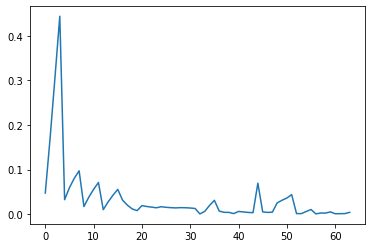

In [860]:
#Some error analysis, however, note the x axis is not labeled, 
#and this is not used for the report
hat = modelz.predict(log_design)
plt.plot(hat)
plt.plot(np.log(angles),'.')
plt.show()
logr = np.log(angles)-modelz.predict(log_design)
plt.plot(np.abs(logr))
plt.show()
plt.plot(angles,'.')
plt.plot(np.exp(modelz.predict(log_design)))
plt.show()
plt.plot(np.abs(angles-np.exp(modelz.predict(log_design))))

[1.10e+02 1.20e+00 1.56e-03]
0.6348506826836767
[2.50e+00 1.20e+00 1.56e-03]
2.2713555720718888


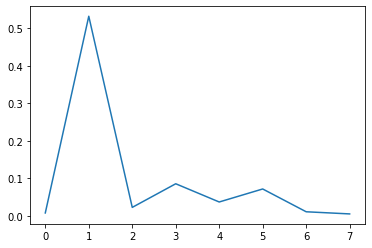

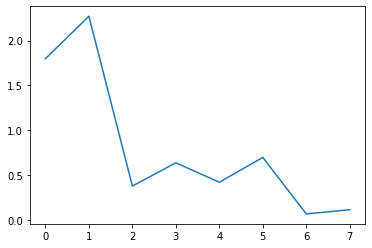

In [799]:
plt.plot(np.abs(r))
print(parameter_mat[np.argmax(r),:])
print(angles[np.argmax(r)])
print(parameter_mat[np.argmax(angles),:]) 
print(angles[np.argmax(angles)])
plt.show()
plt.plot(angles)

0.09353935008357506
0.011741852536068631
0.0077210956926371255
0.011763576572460077
0.014143314450687394
0.013747908047647472
0.013489410016178816
0.01172324383317519


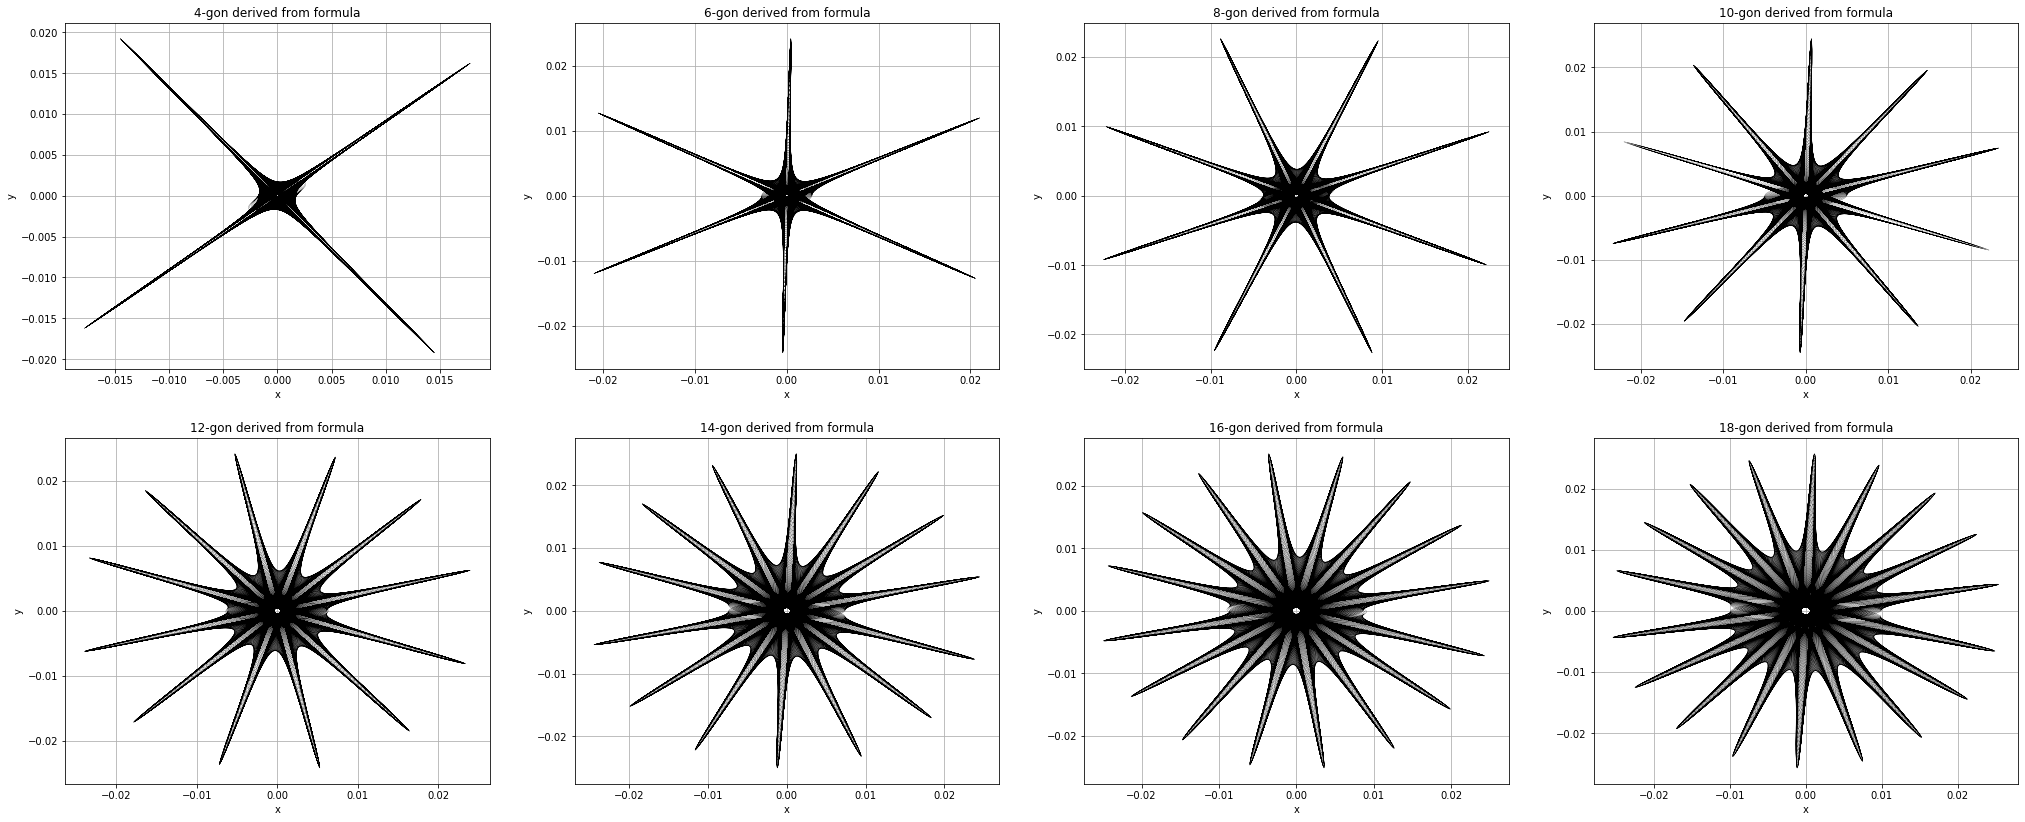

[0.0017129150917972679, 0.002748814435944327, 0.0038449070422157242, 0.00498805114281543, 0.006170145871864076, 0.007385646756657131, 0.008630497935404815, 0.009901591810173412]
[0.001419960640713026, 0.0024213431343661574, 0.003535956297022881, 0.004743125818536209, 0.006029578044442055, 0.007385937008813971, 0.008805164436232157, 0.010281747945987805]


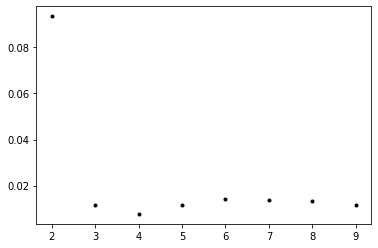

In [1042]:
#evaluation figure
def prec_input(angle, g,l,y0d,z0):
    eta_1 = g*z0/y0d**2
    eta_2 = l/z0
    eta_3 = (angle/eta_1**alpha/eta_2**beta/Gamma)**(1/gamma)
    return eta_3*z0
def prec_input2(angle):
    z0 = 0.012
    y0d= 0.00489
    l = 1
    g = np.pi**2
    a1 = -1.1699012851606558
    a2 = -0.75973438
    return (angle/np.exp(a1))**(1/a2)*0.012
x0_given_angle=np.vectorize(prec_input)
prec_input(0.5363020433113975, np.pi**2, 1, 0.00489, 0.012)
ns = range(2, 10)
thetas = np.array([np.pi/k for k in ns])
vecx = []
vecx2 = []
plt.figure(figsize=(35,14))
count = 0
errors=[]
times=[500, 600, 800, 800, 1000, 1070, 1150, 1200]

for theta in thetas:
    x0 = prec_input(theta, np.pi**2, 1, 0.00489, 0.012)
    x02=prec_input2(theta)
    vecx.append(x0)
    vecx2.append(x02)
    z0 = 0.012
    y0 = 0
    y0d= 0.00489
    ic = (x0,0,y0,y0d,z0,0)
    l = 1
    g = np.pi**2
    m = 1
    k = 4*g*m/l
    w= np.sqrt(g/l)
    lambd = 3*g/l**2
    t = np.linspace(0,times[count],50001)
    u = odeint(RHS,ic,t,args=(w,))
    x = u[:,0]
    y = u[:,2]
    angle,t1=compute_precession_angle(x,y)
    count+=1
    print(theta-angle)
    errors.append(theta-angle)
    plt.subplot(2, 4, count)
    plt.plot(x,y, linewidth=0.2, c='black')
    plt.title(f'{2*count+2}-gon derived from formula')
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.grid()
plt.show()
print(vecx)
print(vecx2)
plt.figure()
plt.plot(ns, errors,'.',c='black')

In [896]:
np.tan(1/np.sqrt(2))

0.8545104320096018

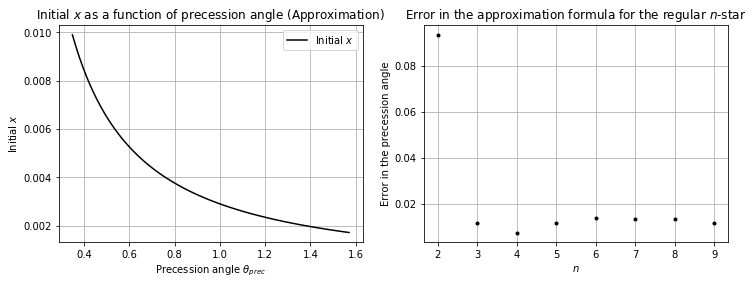

In [1038]:
angle_vec = np.linspace(np.pi/9, np.pi/2,80)
xs = x0_given_angle(angle_vec, np.pi**2, 1, 0.00489, 0.012)
xs
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(angle_vec, xs, c='black', label=r'Initial $x$')
plt.title(r'Initial $x$ as a function of precession angle (Approximation)')
plt.xlabel(r'Precession angle $\theta_{prec}$')
plt.ylabel(r'Initial $x$')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(ns, errors,'.',c='black')
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel('Error in the precession angle')
plt.title(r'Error in the approximation formula for the regular $n$-star')
plt.show()
